In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline 
pd.set_option('display.max_columns', None)

from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression


In [2]:
housing = pd.read_csv('./data/Ames_Housing_Price_Data.csv')

print(housing.shape)
#housing.head()

(2580, 82)


In [3]:
#housing.columns

In [4]:
price = housing['SalePrice']
size_related = housing.filter(regex='SF$|Area$')
# size_related.head()

## Unary Feature Selection

In [5]:
size_related.isnull().sum(axis=0)

GrLivArea        0
LotArea          0
MasVnrArea      14
BsmtUnfSF        1
TotalBsmtSF      1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GarageArea       1
WoodDeckSF       0
OpenPorchSF      0
PoolArea         0
dtype: int64

In [6]:
size_related = size_related.fillna(0.0)  # We fill the very minor missing values by 0.0
F_values, p_values = f_regression(size_related, housing['SalePrice'])

pd.Series(p_values, index=size_related.columns).sort_values()

GrLivArea        0.000000e+00
TotalBsmtSF     7.306053e-313
1stFlrSF        1.616946e-300
GarageArea      6.423062e-291
MasVnrArea      4.164095e-162
WoodDeckSF       6.015295e-68
OpenPorchSF      2.930048e-57
LotArea          8.303020e-46
2ndFlrSF         4.007008e-42
BsmtUnfSF        8.441921e-18
PoolArea         1.172748e-01
LowQualFinSF     1.173873e-01
dtype: float64

In [7]:
size_related.isnull().sum(axis=0)

GrLivArea       0
LotArea         0
MasVnrArea      0
BsmtUnfSF       0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
PoolArea        0
dtype: int64

Vanishing p value for GrLivArea points to strong statistical relationship


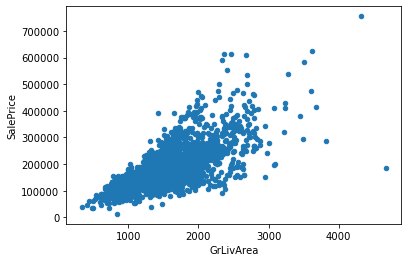

In [8]:
housing[['GrLivArea', 'SalePrice']].plot(kind='scatter', x='GrLivArea', y='SalePrice')

In [9]:
lm = LinearRegression()

grLivArea = size_related[['GrLivArea']]

lm.fit(grLivArea, price)
lm.score(grLivArea, price)

0.5183732056699005

Use log scale due to fan shape relationship -> constant variance assumption of simple linear regression is violated

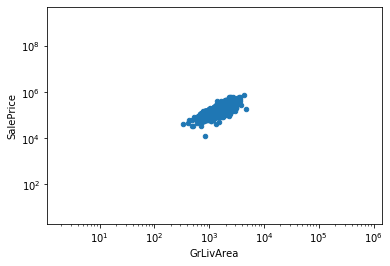

In [10]:
housing[['GrLivArea', 'SalePrice']].plot(kind='scatter', x='GrLivArea', y='SalePrice', logx=True, logy=True)

In [11]:
# df_flips = housing[(housing['YrSold'] - housing['YearRemodAdd']) <= 2]
# df_flips.reset_index()
# df_flips.drop(['Unnamed: 0'], axis=1, inplace=True)

# df_flips.drop(['PID', 'MSSubClass', 'MSZoning', 'LotArea', 'LotFrontage', 'Street',\
#                           'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Condition1',\
#                           'Condition2', 'Electrical', 'MiscFeature', 'MiscVal', 'GarageYrBlt'], axis=1, inplace=True)

# df_flips.dtypes

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


GrLivArea         int64
SalePrice         int64
Utilities        object
Neighborhood     object
BldgType         object
                  ...  
Fence            object
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
Length: 64, dtype: object

In [13]:
# df_flips['Baths'] = df_flips.loc[:, 'BsmtFullBath'] + (df_flips.loc[:, 'BsmtHalfBath']/2) +\
#                     df_flips.loc[:, 'FullBath']+ (df_flips.loc[:, 'HalfBath']/2)

#df_flips = df_flips.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis=1)

In [14]:
z=[]
for index, row in df_flips.iterrows():
        z.append(df_flips['BsmtFullBath'] + df_flips['FullBath'] + (df_flips['BsmtHalfBath'] + df_flips['HalfBath'])/2)
        
df_flips['Baths'] = z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [15]:
# df_flips['Baths'] = df_flips.apply(lambda row: df_flips['BsmtFullBath'] + df_flips['FullBath'] + (df_flips['BsmtHalfBath'] + df_flips['HalfBath'])/2 )

# df_flips = df_flips.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis=1)

In [16]:
housing_cleaned = pd.read_csv('./data/Ames_HousePrice_withAddress_Cleaned.csv')
housing_cleaned.drop(['Unnamed: 0'], axis=1, inplace=True)

In [17]:
housing_cleaned.sample(7)

,GrLivArea,SalePrice,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,GeoRefNo,Prop_Addr,lat,long,Baths,Class_1.5story,Class_1story_dev,Class_2story,Class_2story_dev,Class_duplex,Class_split,Lot_Corner,Lot_CulDSac,Lot_FR,Foundation_Concrete,Foundation_Other,price_per_sqf
662,1112,144800,0,70.0,9100,0,0,0,5,6,1954,1954,0,0.0,3,4,3.0,3.0,154.0,694.0,264.0,1112.0,5,1,0.0,0,2,1,3,6,7,1,4.0,0.0,1.0,1.0,390.0,3.0,3.0,1,0,0,0,0,0,0,3.0,909282130,707 BEACH AVE,42.016043,-93.639473,2.0,0,0,0,0,0,0,0,0,0,0,1,130.215827
2205,1891,212500,0,0.0,18837,1,0,0,6,5,1978,1978,0,0.0,3,3,4.0,3.0,687.0,46.0,491.0,1224.0,3,1,0.0,0,3,1,3,7,7,1,3.0,0.0,2.0,2.0,678.0,3.0,3.0,1,0,69,0,0,0,0,0.0,534152070,2110 PRAIRIE VIEW EAST,42.043317,-93.637346,3.5,1,0,0,0,0,0,0,0,0,1,0,112.374405
1525,882,106500,0,0.0,8339,1,0,0,5,7,1959,1959,0,0.0,3,3,0.0,0.0,0.0,0.0,0.0,0.0,3,1,0.0,0,3,1,3,5,7,0,0.0,0.0,2.0,1.0,294.0,3.0,3.0,1,0,0,0,0,0,0,3.0,534276290,2030 MELROSE AVE,42.042640,-93.622292,1.0,0,0,0,0,0,0,0,0,0,0,1,120.748299
2055,1346,112000,0,70.0,11767,0,0,0,4,7,1910,2000,0,0.0,3,3,2.0,3.0,0.0,0.0,560.0,560.0,4,0,0.0,0,2,1,3,6,5,0,0.0,1.0,1.0,1.0,384.0,2.0,3.0,1,168,24,0,0,0,0,2.0,908275090,304 S FRANKLIN AVE,42.019570,-93.664631,1.5,1,0,0,0,0,0,0,0,0,0,0,83.209510
678,1475,127000,1,41.0,2665,0,0,0,5,6,1977,1977,0,0.0,3,3,3.0,3.0,548.0,173.0,36.0,757.0,5,1,0.0,0,4,1,3,6,7,1,3.0,0.0,2.0,1.0,336.0,3.0,3.0,1,104,26,0,0,0,0,0.0,923225240,3472 SOUTHDALE DR,41.990575,-93.603825,2.0,0,0,0,1,0,0,0,0,0,1,0,86.101695
425,1196,128000,1,50.0,6000,0,0,0,6,6,1940,1950,0,0.0,3,4,3.0,3.0,264.0,0.0,308.0,572.0,5,1,1.0,0,3,1,3,6,7,2,4.0,1.0,1.0,2.0,576.0,3.0,3.0,1,0,0,0,0,0,0,0.0,903227020,1225 ROOSEVELT AVE,42.033663,-93.622638,2.0,1,0,0,0,0,0,0,0,0,0,0,107.023411
1327,864,65000,1,60.0,9000,0,1,0,4,6,1920,1950,0,0.0,3,3,2.0,2.0,0.0,0.0,592.0,592.0,5,1,0.0,0,3,1,2,5,5,0,0.0,1.0,1.0,1.0,216.0,2.0,2.0,0,0,30,160,0,0,0,0.0,911226030,116 CHERRY AVE,42.022531,-93.604157,1.5,0,0,1,0,0,0,0,0,0,0,1,75.231481


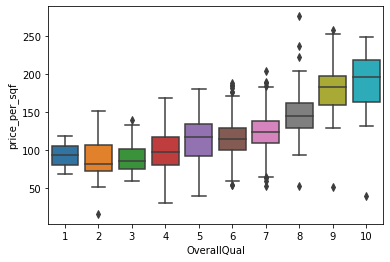

In [18]:
ax = sns.boxplot(data=housing_cleaned,  x='OverallQual', y='price_per_sqf')

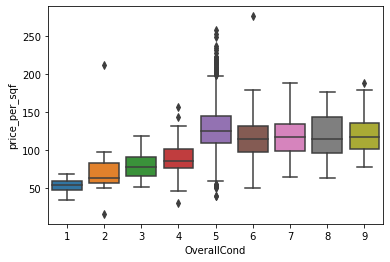

In [19]:
ax = sns.boxplot(data=housing_cleaned,  x='OverallCond', y='price_per_sqf')

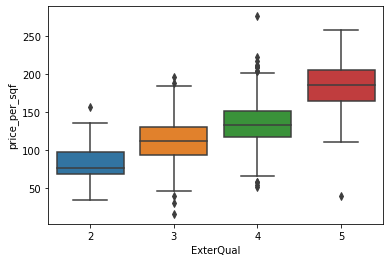

In [20]:
ax = sns.boxplot(data=housing_cleaned,  x='ExterQual', y='price_per_sqf')

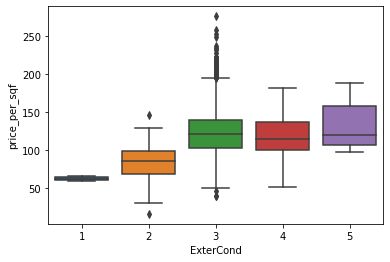

In [21]:
ax = sns.boxplot(data=housing_cleaned,  x='ExterCond', y='price_per_sqf')

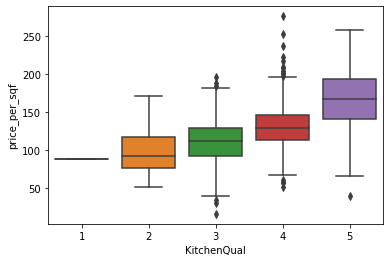

In [22]:
ax = sns.boxplot(data=housing_cleaned,  x='KitchenQual', y='price_per_sqf')

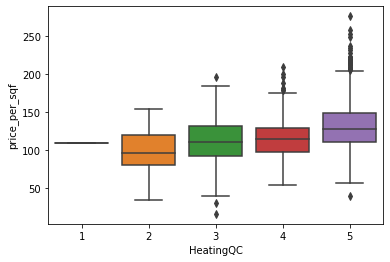

In [23]:
ax = sns.boxplot(data=housing_cleaned,  x='HeatingQC', y='price_per_sqf')

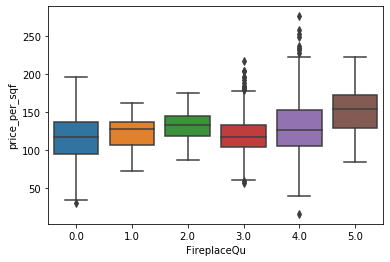

In [24]:
ax = sns.boxplot(data=housing_cleaned,  x='FireplaceQu', y='price_per_sqf')

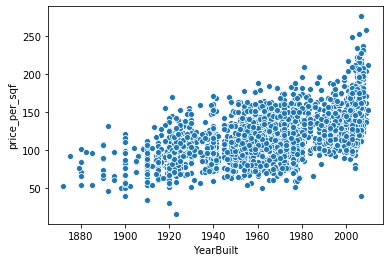

In [25]:
sns.scatterplot(data=housing_cleaned, x="YearBuilt", y='price_per_sqf')

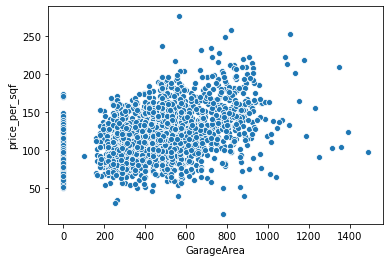

In [26]:
sns.scatterplot(data=housing_cleaned, x="GarageArea", y='price_per_sqf')